In [1]:
import pandas as pd

df = pd.read_csv("sales_data_3_months.csv")
df.head()


,Date,Product,Quantity,Price,Region,Total_Sales
0,2026-01-01,Tablet,4,23047,South,92188
1,2026-01-02,Headphones,2,31105,East,62210
2,2026-01-03,Laptop,2,15230,East,30460
3,2026-01-04,Tablet,4,20707,West,82828
4,2026-01-05,Tablet,5,26976,West,134880


In [2]:
df["Total_Sales"] = df["Quantity"] * df["Price"]
df.head()


,Date,Product,Quantity,Price,Region,Total_Sales
0,2026-01-01,Tablet,4,23047,South,92188
1,2026-01-02,Headphones,2,31105,East,62210
2,2026-01-03,Laptop,2,15230,East,30460
3,2026-01-04,Tablet,4,20707,West,82828
4,2026-01-05,Tablet,5,26976,West,134880


In [3]:
df.isnull().sum()


Date           0
Product        0
Quantity       0
Price          0
Region         0
Total_Sales    0
dtype: int64

In [4]:
df.duplicated().sum()


np.int64(0)

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         90 non-null     datetime64[ns]
 1   Product      90 non-null     object        
 2   Quantity     90 non-null     int64         
 3   Price        90 non-null     int64         
 4   Region       90 non-null     object        
 5   Total_Sales  90 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.3+ KB


In [6]:
region_sales = df.groupby("Region")["Total_Sales"].sum()
region_sales


Region
East     1542904
North    1673372
South    1857863
West     2179346
Name: Total_Sales, dtype: int64

In [7]:
product_sales = df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)
product_sales


Product
Headphones    1978630
Tablet        1958761
Laptop        1685582
Phone         1630512
Name: Total_Sales, dtype: int64

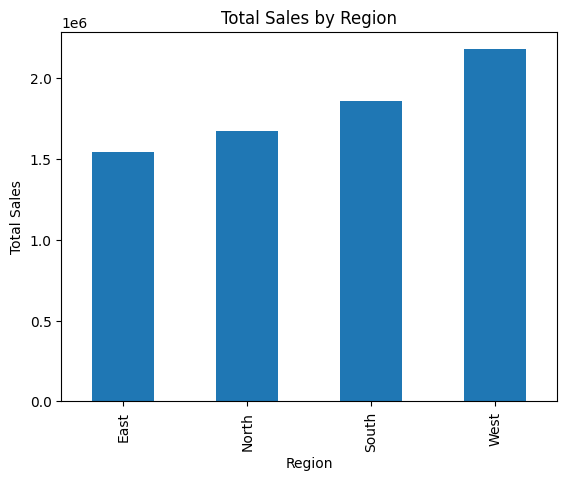

In [8]:
import matplotlib.pyplot as plt

region_sales.plot(kind="bar", title="Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


In [9]:
df["Month"] = df["Date"].dt.month_name()

monthly_sales = df.groupby("Month")["Total_Sales"].sum()
monthly_sales


Month
February    2232009
January     2210604
March       2810872
Name: Total_Sales, dtype: int64

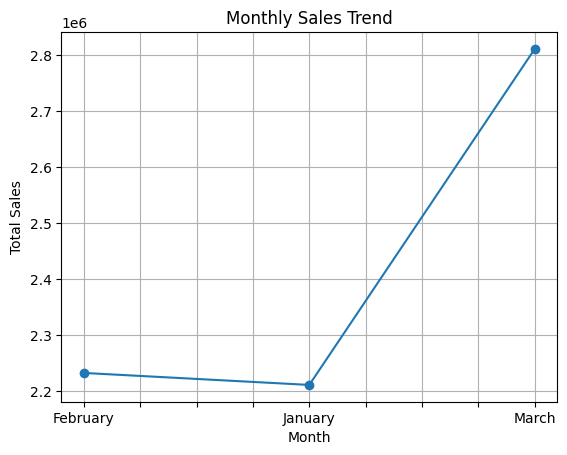

In [10]:
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [11]:
top_products = (
    df.groupby("Product")["Total_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_products


Product
Headphones    1978630
Tablet        1958761
Laptop        1685582
Phone         1630512
Name: Total_Sales, dtype: int64

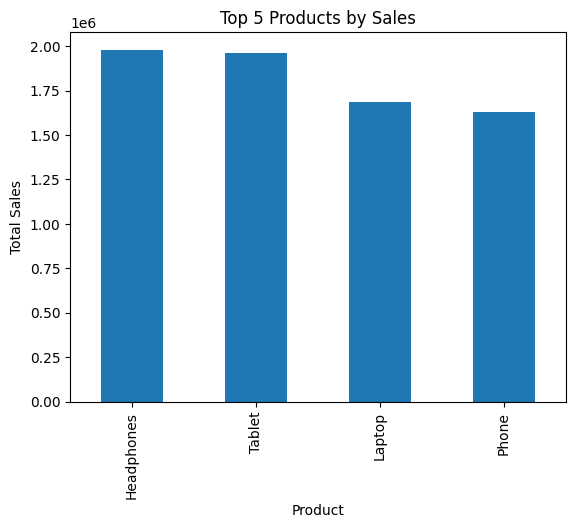

In [12]:
top_products.plot(kind="bar", title="Top 5 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()
